---
title: "Linear Regression implementation from scratch with Python"
date: "2025-01-13"
author: Anushka Dhiman
categories: [Machine Learning]
---
___

## Overview

Linear regression is a fundamental and powerful model for predicting numeric data from one or more independent variables. This article focuses on implementing linear regression using Python, without delving into the deeper theoretical aspects. Despite the emergence of more complex algorithms like LLM, linear regression remains widely used across various domains due to its effectiveness, interpretability, and extensibility. Understanding linear regression is crucial for building a strong foundation in machine learning, as its core concepts are applied broadly.

In a similar manner, I intend to create a playlist that covers other machine learning algorithms from scratch. You can find the list of topics covered in this series.

Let's get started!

## What is Linear regression?

Linear regression is a statistical method used to model the relationship between a dependent variable (often denoted as "y") and one or more independent variables (often denoted as "x"). 

The goal is to find the best fitting line through the data points the minimises the prodiction error.

Imagine you have a scatter plot of data points. Linear regression tries to find a straight line that best represent the relationship between the independent variable and the dependent variable.  

The line is choosen to minimise the difference between the predicated value and he actual data points. The diference is called the residual error and the goal is to minimise the residual error and hence the best values for model parameters **m & c** by finding the best fit line.



The most common form of linear regression is simple linear regression, which models the relationship between two variables:

[<img src="lineEquation.png" alt="lineEquation" style="display: block; margin: auto; " width="500"/>](../insights/StatisticsandProbability/MachineLearning/lineEquation.png) 

## Code Implementation using python

### Simple linear regression 

Here is a basic implementation of simple linear regression in Python using the least squares method:

> Let's break it down step by step:

In [2]:
#Importing Libraries
import numpy as np # library for numerical operations

class LinearRegression: 
  # Creted a class named LinearRegression, defining the structure and methods needed to perform linear regression

  def __init__(self):
    self.slope = None #store the slope (m) of the line 
    self.intercept = None #store the intercept (b) of the line 

  def fit(self, X, y):
    # fit method to compute the slope and intercept of the best-fit line based on the data points X and y.

    n = len(X) 

    #calculates the mean of the X values (x_mean) and the mean of the y values (y_mean).

    x_mean = np.mean(X)  
    y_mean = np.mean(y)

    #initializes two variables, numerator and denominator, to store intermediate results for calculating the slope.
    numerator = 0 
    denominator = 0

    #loops over each data point and computes numerator and denominator
    for i in range(n):
        numerator += (X[i] - x_mean) * (y[i] - y_mean) # the sum of the product of the deviations X[i] and y[i] from their means
        denominator += (X[i] - x_mean) ** 2 # the sum of the squared deviations of X[i] from the mean of X

    self.slope = numerator / denominator
    self.intercept = y_mean - self.slope * x_mean


  def predict(self, X): #predict method makes predictions

    """For each input value x in the list X, the method computes the corresponding predicted value of y using the formula: y=mx+b
      where m is the slope and b is the intercept, both of which were calculated during the fitting process."""

    y_pred = []
    for x in X:
        y_pred.append(self.slope * x + self.intercept)
    return y_pred




**Slope (m):** The slope is computed as the ratio of the numerator to the denominator. This is the formula for the slope of a simple linear regression line:

$$ \text{slope} = \frac{\sum(X[i] - x_{\text{mean}})(y[i] - y_{\text{mean}})}{\sum(X[i] - x_{\text{mean}})^2} $$

**Intercept (b):** The intercept is computed by subtracting the product of the slope and the mean of X from the mean of y:

$$ \text{intercept} = y_{\text{mean}} - (\text{slope} \times x_{\text{mean}}) $$


Let's test our code

In [7]:
# Example Data
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Create an instance of LinearRegression
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions
predictions = model.predict([6, 7, 8])
print(predictions)


[5.8, 6.4, 7.0]


In [8]:
print("slope of the line: ", model.slope)
print("intercept of the line: ", model.intercept)

slope of the line:  0.6
intercept of the line:  2.2


After fitting the model, the slope (m) and intercept (b) of the best-fit line are printed.

Slope: 0.6 — This means that for each increase of 1 in X, y increases by 0.6 on average.

Intercept: 2.2 — This is the predicted value of y when X is 0

In [9]:
y_pred = model.predict(X)
print(y_pred)  # Output: [2.8, 3.4, 4.0, 4.6, 5.2]

[2.8000000000000003, 3.4000000000000004, 4.0, 4.6, 5.2]


Using the calculated slope = 0.6 and intercept = 2.2, the predictions for X = [1, 2, 3, 4, 5] are:

For X = 1: y = 0.6 * 1 + 2.2 = 2.8

For X = 2: y = 0.6 * 2 + 2.2 = 3.4

For X = 3: y = 0.6 * 3 + 2.2 = 4.0

For X = 4: y = 0.6 * 4 + 2.2 = 4.6

For X = 5: y = 0.6 * 5 + 2.2 = 5.2

These predicted values ([2.8, 3.4, 4.0, 4.6, 5.2]) as a result.

### Linear Regression using the Normal Equation

### Model Equation
The model is described as:

$$ y = X \cdot W $$

where:
- **X** is the matrix of input data (size \( n \times d \), where \( n \) is the number of samples and \( d \) is the number of features).
- **y** is the vector of output values (size \( n \times 1 \)).
- **W** is the vector of weights (size \( d \times 1 \), including the intercept).

### Normal Equation
The weights **W** are computed using the normal equation, which provides a direct way to solve for the optimal weights:

$$ W = (X^T \cdot X)^{-1} \cdot X^T \cdot y $$

- $ X^T $ is the transpose of **X**.

- $ (X^T \cdot X) $ is the Gram matrix.

- The inverse of this matrix is calculated and multiplied by $$ (X^T \cdot y) $$ to give the optimal weights **W**.


In [11]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.W = None #hold the weights of the regression mode

    def fit(self, X, y):
        n = X.shape[0]  # Number of samples
        X = np.hstack([np.ones((n, 1)), X])  # Add bias term (1s) as the first column of X
        self.W = np.linalg.inv(X.T @ X) @ X.T @ y #Normal Equation:

    def predict(self, X):
        n = X.shape[0]  # Number of samples
        X = np.hstack([X, np.ones((n, 1))])  # Add bias term
        return X @ self.W  # Predicted values
    


In [19]:
# Create example input data
X = np.array([[2, 2], [4, 5], [7, 8]])
y = np.array([9, 17, 26])

# Fit linear regression model
lr = LinearRegression()
lr.fit(X, y)

# Make predictions on new data
X_new = np.array([[10, 11], [13, 14]])
y_pred = lr.predict(X_new)

# Print the predictions
print("Predictions:", y_pred)  # Expected output: [43.0, 55.0]

# Explanation of the weights:
print("\nThe weights W are printed out, which includes:")
print("The first value", lr.W[0], "is the intercept (bias term).")
print("The second value", lr.W[1], "corresponds to the weight for the first feature.")
print("The third value", lr.W[2], "corresponds to the weight for the second feature.")

Predictions: [35.28429975 44.49290696]

The weights W are printed out, which includes:
The first value 2.8789171100469577 is the intercept (bias term).
The second value 1.3595104661934938 corresponds to the weight for the first feature.
The third value 1.7100252704129753 corresponds to the weight for the second feature.


### Improvement in Linear Regression code

To enhance the robustness, efficiency, scalability, and generalization ability of the linear regression model, some improvements are neccesary 

1. **Add Regularization (L2 Regularization)**

Regularization helps prevent overfitting. L2 regularization (also known as Ridge Regression) involves adding a penalty term to the cost function that is proportional to the sum of the squared coefficients. The formula for L2 regularization is:

$$ \text{Cost Function} = \sum(y - \hat{y})^2 + \lambda \sum W^2 $$

where:
- $$\lambda$$ (lambda) is the regularization parameter.
- W represents the model's coefficients.

To implement this, we will modify the weight update rule by adding a penalty term to the objective function.

2. **Use Gradient Descent**
Instead of solving for the weights directly using the Normal Equation (which can be computationally expensive for large datasets), we can use gradient descent to iteratively minimize the cost function. The gradient descent update rule is:

$$ W = W - \alpha \cdot \nabla J(W) $$

where:
- $$ \alpha $$ is the learning rate.
- J(W) is the cost function.

We will implement a method that updates the coefficients iteratively based on the gradient of the cost function.



In [24]:
import numpy as np

class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, num_iterations=1000, lambda_reg=0):
        """
        Initializes the linear regression model.
        :param learning_rate: Learning rate for gradient descent (default: 0.01)
        :param num_iterations: Number of iterations for gradient descent (default: 1000)
        :param lambda_reg: Regularization parameter for L2 regularization (default: 0)
        """
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.lambda_reg = lambda_reg
        self.W = None

    def _validate_input(self, X, y):
        """
        Validate input arrays X and y.
        Ensure they have the same length and are not empty.
        """
        if X.shape[0] != y.shape[0]:
            raise ValueError("X and y must have the same number of samples.")
        if X.shape[0] == 0:
            raise ValueError("Input arrays X and y cannot be empty.")

    def fit(self, X, y):
        """
        Fit the model using gradient descent or the normal equation.
        :param X: Features matrix (n x d)
        :param y: Target vector (n x 1)
        """
        # Validate inputs
        self._validate_input(X, y)
        
        # Add bias term (ones column) to X
        n = X.shape[0]
        X = np.hstack([np.ones((n, 1)), X])

        # Initialize weights
        self.W = np.zeros(X.shape[1])

        # Gradient Descent
        for _ in range(self.num_iterations):
            predictions = X @ self.W
            errors = predictions - y
            
            # Compute gradient
            gradient = (2/n) * X.T @ errors + (2 * self.lambda_reg * self.W)
            
            # Update weights
            self.W -= self.learning_rate * gradient

    def predict(self, X):
        """
        Make predictions using the learned model.
        :param X: Features matrix (n x d)
        :return: Predicted values (n x 1)
        """
        n = X.shape[0]
        X = np.hstack([np.ones((n, 1)), X])  # Add bias term
        return X @ self.W


In [25]:
# Example usage:
X = np.array([[2, 2], [4, 5], [7, 8]])  # Input data
y = np.array([9, 17, 26])  # Target data

# Create model with L2 regularization (lambda_reg > 0) and gradient descent
lr = LinearRegressionGD(learning_rate=0.01, num_iterations=1000, lambda_reg=0.1)

# Fit the model to the data
lr.fit(X, y)
print("Weights:", lr.W)

# Make predictions on new data
X_new = np.array([[10, 11], [13, 14]])
y_pred = lr.predict(X_new)
print("Predictions:", y_pred)

Weights: [2.0109441  1.50918066 1.71595145]
Predictions: [35.97821669 45.65361304]


## Visualization

Let's visualise it on scatter plot, giving a clear picture of how well the regression line fits the data points!

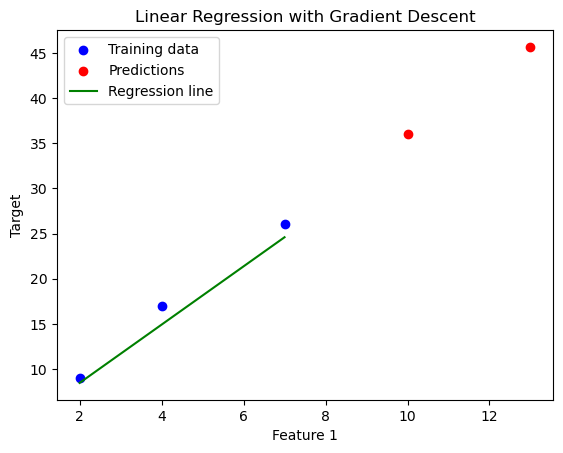

In [26]:
import matplotlib.pyplot as plt

# Plotting the data and the linear regression model
plt.scatter(X[:, 0], y, color='blue', label='Training data')

# Plot the predicted values
plt.scatter(X_new[:, 0], y_pred, color='red', label='Predictions')

# Optionally, plot the regression line for the training data (assuming 2D data for visualization)
# Generate a range of X values for the line (from the min to max of the training data)
x_line = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_line = lr.predict(np.column_stack([x_line, x_line]))  # Prediction on the line
plt.plot(x_line, y_line, color='green', label='Regression line')

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Linear Regression with Gradient Descent')
plt.legend()

# Show the plot
plt.show()